# BigMart Sales Prediction!
## Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 **sales data for 1559 products across 10 stores in different cities** . Also, certain attributes of each product and store have been defined. **The aim is to build a predictive model and predict the sales of each product at a particular outlet.**

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

**Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.**



Data Dictionary
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

In [ ]:
# IMPORTATION OF LIB
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv("/content/Train.csv")
test = pd.read_csv("/content/test.csv")

In [ ]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [ ]:
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [ ]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [ ]:
# lets combine the data

combined = pd.concat([train,test], ignore_index = True)

In [ ]:
combined.select_dtypes(include = np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

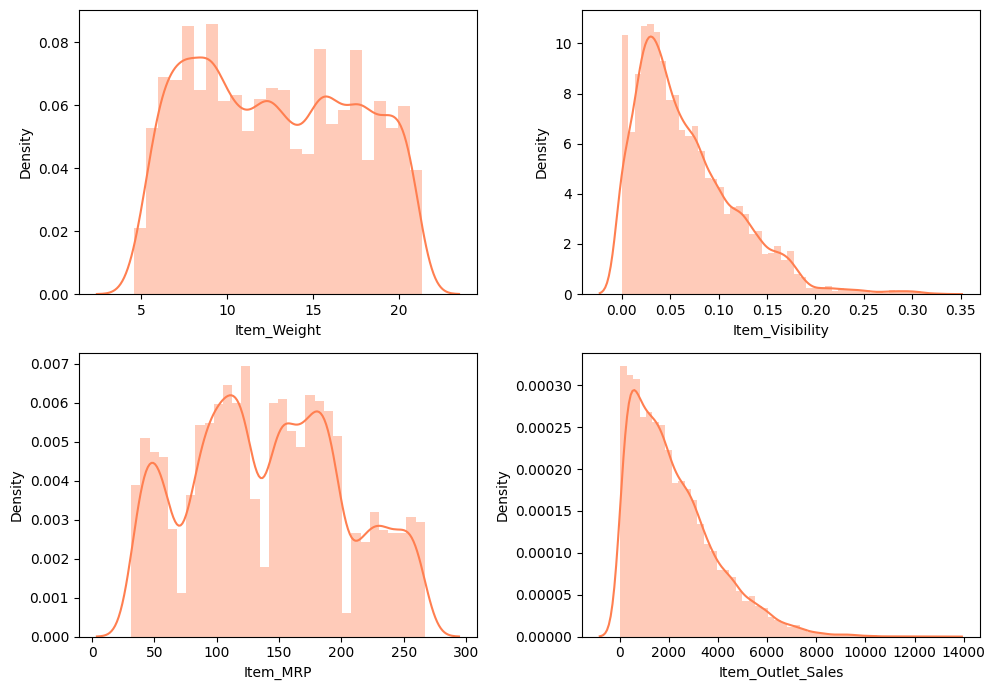

In [ ]:
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

nrows = 2
ncolumns = 2
iterator = 1

plt.figure(figsize = (10,7))
for i in num_cols:
  plt.subplot(nrows, ncolumns, iterator)
  sns.distplot(combined.loc[:,i], color = 'coral')
  iterator += 1

plt.tight_layout()
plt.show()

In [ ]:
# CAtegorical Analysis

combined.select_dtypes(include = 'object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

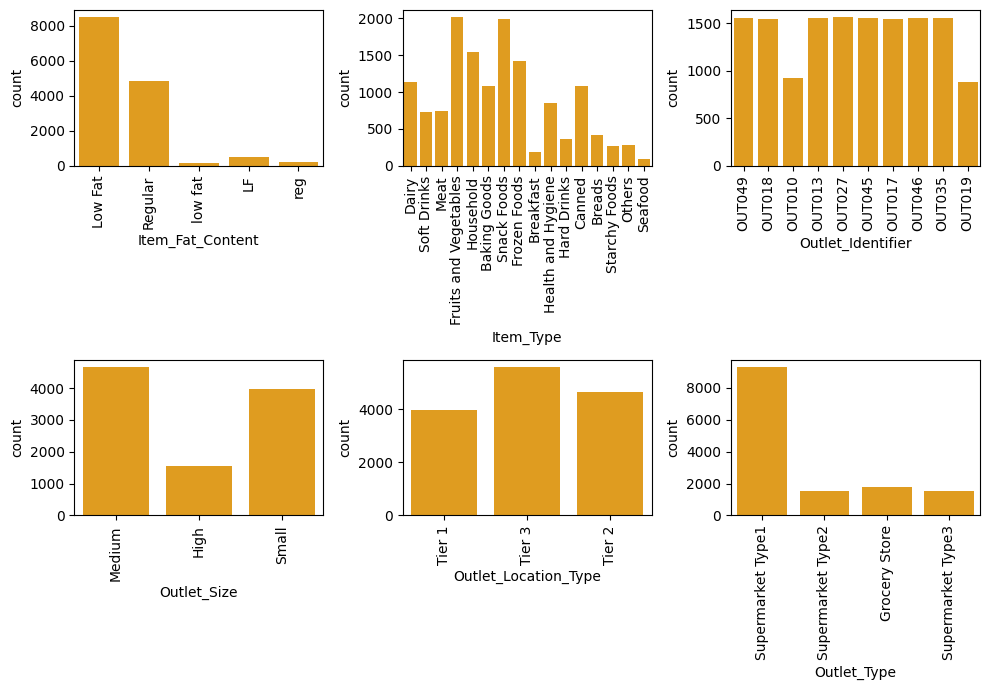

In [ ]:
cat_cols = [ 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
            'Outlet_Size', 'Outlet_Location_Type' , 'Outlet_Type']


nrows = 2
ncolumns = 3
iterator = 1

plt.figure(figsize = (10,7))
for i in cat_cols:
  plt.subplot(nrows, ncolumns, iterator)
  sns.countplot(x = combined.loc[:,i], color = 'orange' )
  iterator += 1
  plt.xticks(rotation = 90)
plt.tight_layout()

plt.show()

In [ ]:
# Convert the item Fat Content
combined.Item_Fat_Content.unique()


combined.Item_Fat_Content.replace(to_replace = ['low fat', 'LF', 'reg'], value = ['Low Fat', 'Low Fat', 'Regular']\
                                  , inplace = True)

<Axes: xlabel='Item_Type'>

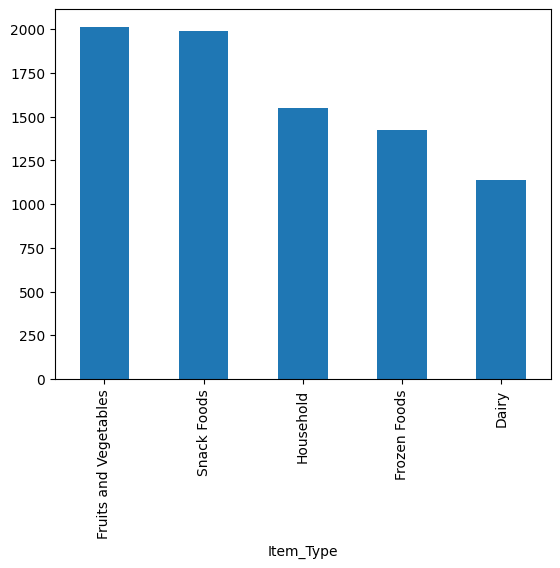

In [ ]:
# Item Type

combined.Item_Type.value_counts()[:5].plot(kind = 'bar')

# So top 5 items are snacks, dairy, frozen food, household, fruits and vegetables

## Bivariate Analysis

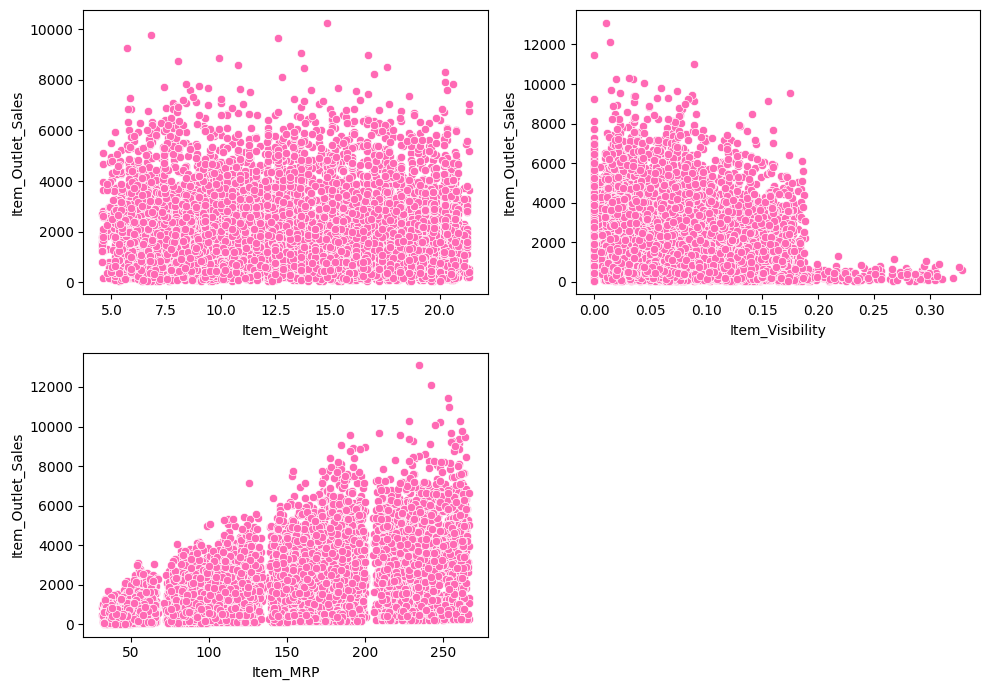

In [ ]:
num = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

nrows =2
ncolumns = 2
iterator = 1
plt.figure(figsize = (10,7))
for i in num:
  plt.subplot(nrows, ncolumns, iterator)
  sns.scatterplot(x = i, y = 'Item_Outlet_Sales', data = combined, color = 'hotpink')
  iterator += 1

plt.tight_layout()
plt.show()

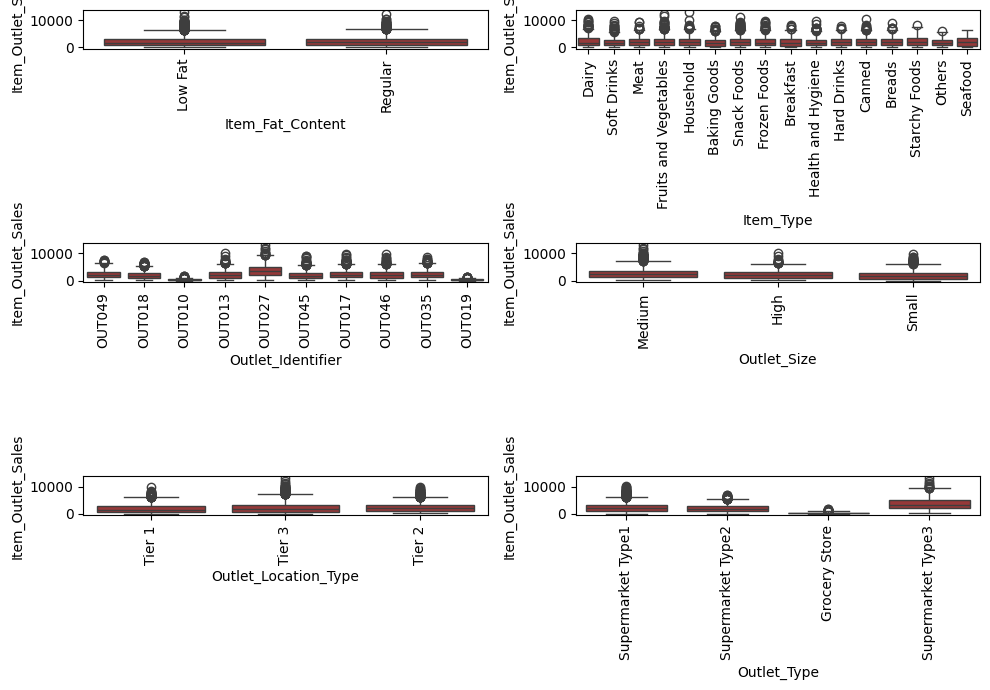

In [ ]:
nrows =3
ncolumns = 2
iterator = 1
plt.figure(figsize = (10,7))
for i in cat_cols:
  plt.subplot(nrows, ncolumns, iterator)
  sns.boxplot(x = i, y = 'Item_Outlet_Sales', data = combined, color = 'brown')
  iterator += 1
  plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [ ]:
# Missing Values
combined.isnull().sum()[combined.isnull().sum()!= 0]

,0
Item_Weight,2439
Outlet_Size,4016
Item_Outlet_Sales,5681


In [ ]:
combined["Item_Weight"] = combined.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
combined["Item_visiblity"] = combined.groupby('Item_Identifier')['Item_Visibility'].transform(lambda x: x.replace(0,x.median()))

In [ ]:
combined.loc[combined.Outlet_Size.isnull(),'Outlet_Type'].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [ ]:
# Imputting Small in Outlet Size
combined.loc[combined.Outlet_Size.isnull(), 'Outlet_Size'] = 'Small'

In [ ]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_visiblity
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.016047
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.019278
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.016760
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,0.022914
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.013177


In [ ]:
# Feature Engineering

In [ ]:
# Extracting ItemIDs
ids = []

for i in combined.Item_Identifier:
  ids.append(i[0:2])

combined['Item_IDS'] = pd.Series(ids)

In [ ]:
combined.Item_IDS.unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [ ]:
# Non Edible in item Fat Content

combined.loc[combined.Item_IDS == 'NC', 'Item_Fat_Content'] = 'Non_Edible'

In [ ]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_visiblity,Item_IDS
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.016047,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.019278,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.016760,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,0.022914,FD
4,NCD19,8.93,Non_Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.013177,NC


In [ ]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
perishables = ['Dairy', 'Meat', 'Fruits and Vegetables',
       'Breakfast', 'Breads', 'Starchy Foods', 'Seafood']

In [ ]:
def badal_na(x):
  if x in perishables:
    return ('Perishable')
  else:
    return ('Non-Perishable')

In [ ]:
combined['Item_Type_Cat'] = combined.Item_Type.apply(badal_na)

In [ ]:
combined.groupby('Item_Type')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,648.0,1952.971207,1546.788045,37.2848,705.08220,1577.9460,2823.82425,7931.6754
Breads,251.0,2204.132226,1644.235914,35.2874,968.73900,1860.2452,3145.90500,8958.3390
Breakfast,110.0,2111.808651,1911.693586,39.9480,679.11600,1554.6430,2970.30025,8209.3140
Canned,649.0,2225.194904,1645.235638,37.9506,952.09400,1860.2452,3101.29640,10306.5840
Dairy,682.0,2232.542597,1884.404698,40.6138,788.97300,1650.8511,3296.20935,10256.6490
Frozen Foods,856.0,2132.867744,1724.777720,36.6190,808.94700,1687.1372,3079.49145,9678.0688
Fruits and Vegetables,1232.0,2289.009592,1799.503459,45.2744,884.84820,1830.9500,3227.13260,12117.5600
Hard Drinks,214.0,2139.221622,1606.191587,37.9506,834.91320,1816.6353,3071.33540,7843.1240
Health and Hygiene,520.0,2010.000265,1553.633063,34.6216,758.84555,1669.4935,2884.57850,9779.9362


In [ ]:
combined['Magic1'] = combined.groupby('Item_Type')['Item_Outlet_Sales'].transform('count')
combined['Magic2'] = combined.groupby('Item_Type')['Item_Outlet_Sales'].transform('max')
combined['Magic3'] = combined.groupby('Item_Type')['Item_Outlet_Sales'].transform('min')
combined['Magic4'] = combined.groupby('Item_Type')['Item_Outlet_Sales'].transform('std')
combined['Magic5'] = combined.groupby('Item_Type')['Item_Outlet_Sales'].transform('median')
combined['Magic6'] = combined.groupby('Item_Type')['Item_Outlet_Sales'].transform('mean')

In [ ]:
combined['Outlet_Identifier'].isnull().sum()

0

In [ ]:
combined['Magic7'] = combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('count')
combined['Magic8'] = combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('max')
combined['Magic9'] = combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('min')
combined['Magic10'] = combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('std')
combined['Magic11'] = combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('median')
combined['Magic12'] = combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('mean')

In [ ]:
combined

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Magic3,Magic4,Magic5,Magic6,Magic7,Magic8,Magic9,Magic10,Magic11,Magic12
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,40.6138,1884.404698,1650.8511,2232.542597,930,7646.0472,111.8544,1513.289464,1966.1074,2348.354635
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,33.2900,1674.249752,1518.0240,2006.511735,928,6768.5228,69.2432,1375.932889,1655.1788,1995.498739
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,47.9376,1695.231081,1829.6184,2158.977911,930,7646.0472,111.8544,1513.289464,1966.1074,2348.354635
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,...,45.2744,1799.503459,1830.9500,2289.009592,555,1775.6886,33.2900,271.014855,250.3408,339.351662
4,NCD19,8.93,Non_Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,...,33.2900,1692.245757,1981.4208,2258.784300,932,10256.6490,73.2380,1533.531664,2050.6640,2298.995256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,...,33.9558,1705.121755,1944.1360,2277.321739,930,9779.9362,101.8674,1488.405631,1945.8005,2277.844267
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,...,58.5904,1773.945328,1968.1048,2374.332773,928,6768.5228,69.2432,1375.932889,1655.1788,1995.498739
14201,NCO17,10.00,Non_Edible,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,...,34.6216,1553.633063,1669.4935,2010.000265,929,8994.9580,99.8700,1462.399658,1834.9448,2192.384798
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Small,Tier 2,...,37.9506,1645.235638,1860.2452,2225.194904,926,9664.7528,143.8128,1550.778025,2005.0567,2340.675263


In [ ]:
# Split the Data into train and test

newtrain = combined.loc[0:train.shape[0]-1,:]
newtest = combined.loc[train.shape[0]:,:]

newtest.drop('Item_Outlet_Sales', axis = 1, inplace = True)

train.shape, newtrain.shape, test.shape, newtest.shape

((8523, 12), (8523, 27), (5681, 11), (5681, 26))

In [ ]:
newtrain.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:

cols = ['Item_Weight', 'Item_Visibility',
       'Item_MRP','Magic1', 'Magic2',
        'Magic3', 'Magic4', 'Magic5', 'Magic6', 'Magic7',
       'Magic8', 'Magic9', 'Magic10', 'Magic11', 'Magic12']
import scipy.stats as stats
pvalue = []

for i in cols:
  teststats, pval = stats.ttest_ind(newtrain.loc[:, i],
                                    newtrain.Item_Outlet_Sales)
  pvalue.append(pval)

pd.DataFrame(pvalue, columns = ["PValue"], index = cols)\
.sort_values("PValue", ascending = False)


,PValue
Magic6,1.000000e+00
Magic12,1.000000e+00
Magic11,3.178472e-49
Magic5,9.443741e-98
Magic4,1.556293e-145
Item_Weight,0.000000e+00
Item_Visibility,0.000000e+00
Item_MRP,0.000000e+00
Magic1,0.000000e+00
Magic2,0.000000e+00


# NOW THIS IS READY FOR MACHINE LEARNING MODELS....
